Importing the libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [206]:
data = pd.read_csv("house_prices_dataset.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [207]:
print(X)

[[2.24835708e+03 3.00000000e+00 9.20000000e+01 2.29979717e+01]
 [1.93086785e+03 2.00000000e+00 2.20000000e+01 1.39842538e+01]
 [2.32384427e+03 6.00000000e+00 3.30000000e+01 2.15009449e+01]
 ...
 [1.64734164e+03 5.00000000e+00 8.00000000e+01 2.18931243e+00]
 [2.24788279e+03 6.00000000e+00 7.30000000e+01 2.79310137e+01]
 [2.32219423e+03 7.00000000e+00 7.30000000e+01 1.05957213e+01]]


In [208]:
print(y)

[200374.09041043 268784.84733716 315020.85767621 ... 233698.38430115
 280766.82737854 342895.30911361]


In [209]:
y=y.reshape(len(y),1)

In [210]:
print(y)

[[200374.09041043]
 [268784.84733716]
 [315020.85767621]
 ...
 [233698.38430115]
 [280766.82737854]
 [342895.30911361]]


Missing/Null values

In [211]:
missing_values = data.isnull().sum()

In [212]:
print(missing_values)

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64


Backward Elimination

In [213]:
import statsmodels.api as sm

X = X.astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
current_p_values = model.pvalues

while True:

  feature_p_values_for_comparison = current_p_values[1:]
  if len(feature_p_values_for_comparison) == 0:
      break

  max_p_value = feature_p_values_for_comparison.max()
  index_to_remove_in_feature_p_values = np.argmax(feature_p_values_for_comparison)

  column_index_in_X_to_remove = index_to_remove_in_feature_p_values + 1

  if max_p_value > 0.05:
    X = np.delete(X, column_index_in_X_to_remove, axis=1)
    model = sm.OLS(y, X).fit()
    current_p_values = model.pvalues
  else:
    break

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 5.751e+04
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:36:17   Log-Likelihood:            -1.1326e+05
No. Observations:               10000   AIC:                         2.265e+05
Df Residuals:                    9995   BIC:                         2.266e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -321.7234   1095.994     -0.294      0.7

Data split into train and test set

In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [215]:
print(X_train)

[[1.00000000e+00 2.41658972e+03 3.00000000e+00 8.10000000e+01
  2.20673856e+01]
 [1.00000000e+00 1.06664971e+03 7.00000000e+00 7.60000000e+01
  4.92793967e+00]
 [1.00000000e+00 2.03874026e+03 4.00000000e+00 7.10000000e+01
  1.16948184e+01]
 ...
 [1.00000000e+00 2.33270841e+03 6.00000000e+00 9.10000000e+01
  2.37131235e+01]
 [1.00000000e+00 1.88069723e+03 6.00000000e+00 3.10000000e+01
  1.68316931e+01]
 [1.00000000e+00 2.28144043e+03 4.00000000e+00 2.60000000e+01
  1.88759718e+01]]


In [216]:
print(X_test)

[[1.00000000e+00 2.08498727e+03 7.00000000e+00 3.80000000e+01
  1.72641810e+01]
 [1.00000000e+00 2.60325448e+03 3.00000000e+00 3.60000000e+01
  1.87675766e+01]
 [1.00000000e+00 2.10363366e+03 4.00000000e+00 4.40000000e+01
  2.37944295e+01]
 ...
 [1.00000000e+00 9.73256726e+02 3.00000000e+00 5.70000000e+01
  1.33510091e+01]
 [1.00000000e+00 2.20743275e+03 2.00000000e+00 6.20000000e+01
  8.92183153e+00]
 [1.00000000e+00 2.23657273e+03 4.00000000e+00 6.80000000e+01
  1.80810945e+01]]


Linear Regression Model

In [217]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [218]:
y_pred = regressor.predict(X_test)

In [219]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9589555541199201

Support Vector Regressor

In [220]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [221]:
y_pred = regressor.predict(X_test)

In [222]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.0054318985132093545

Random forest


In [223]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50,random_state=0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50, random_state=0)

In [224]:
y_pred = regressor.predict(X_test)

In [225]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9449421958101475

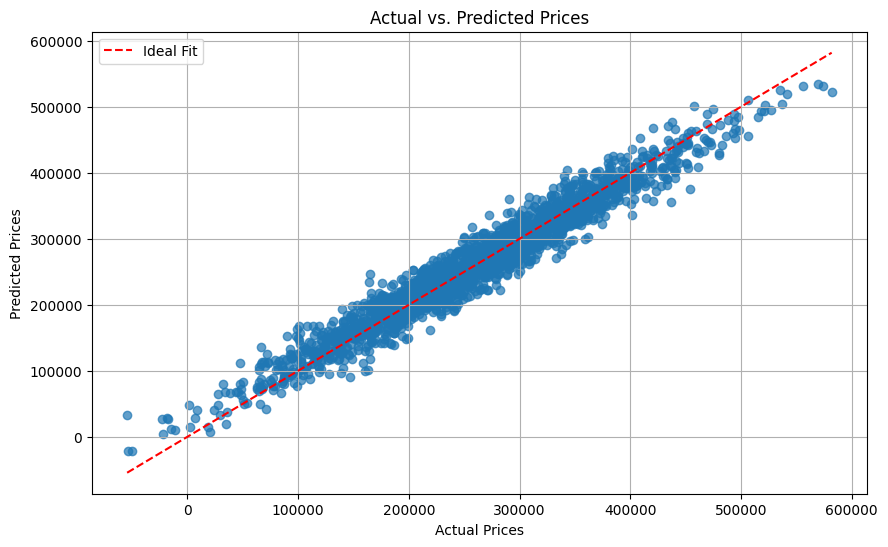

In [226]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.legend()
plt.show()

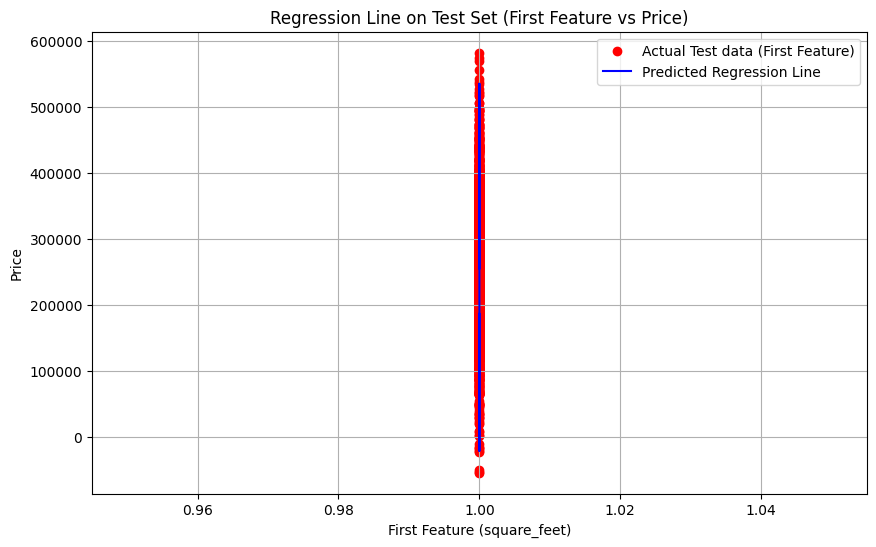

In [227]:
import matplotlib.pyplot as plt
import numpy as np

# Sort X_test and y_pred based on X_test[:, 0] for plotting the regression line smoothly
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted_for_plot = X_test[sorted_indices]
y_pred_sorted_for_plot = regressor.predict(X_test_sorted_for_plot)

# Plotting the regression line on the test set (using the first feature for X-axis)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test.flatten(), color='red', label='Actual Test data (First Feature)')
plt.plot(X_test_sorted_for_plot[:, 0], y_pred_sorted_for_plot.flatten(), color='blue', label='Predicted Regression Line')
plt.title("Regression Line on Test Set (First Feature vs Price)")
plt.xlabel("First Feature (square_feet)") # Assuming 'square_feet' is the first feature
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

The first plot displays **Actual vs. Predicted Prices**. Each point represents a house from the test set, with its actual price on the x-axis and the model's predicted price on the y-axis. The red dashed line represents an 'ideal fit' where predicted price equals actual price. Points close to this line indicate accurate predictions.

The second plot shows the **Regression Line on the Test Set**. The red scattered points are the actual `price` values from the test set plotted against the `square_feet` feature. The blue line represents the prices predicted by the linear regression model for the corresponding `square_feet` values from the test set. This visualization helps to see how well the model captures the underlying trend in the unseen data.

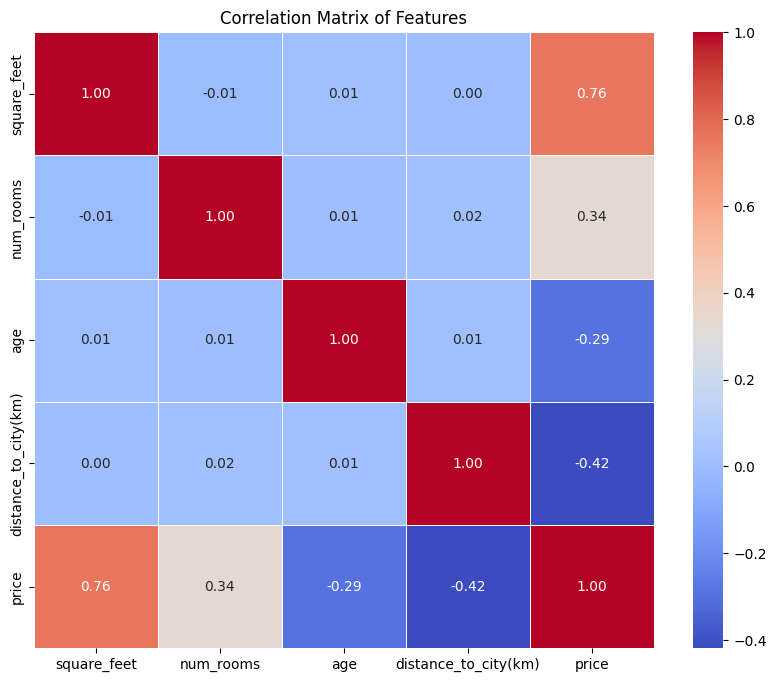

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

The heatmap above visualizes the correlation matrix of your dataset. Each cell shows the Pearson correlation coefficient between two variables:

*   **Values close to 1 (reds)** indicate a strong positive correlation (as one variable increases, the other tends to increase).
*   **Values close to -1 (blues)** indicate a strong negative correlation (as one variable increases, the other tends to decrease).
*   **Values close to 0 (white/light colors)** indicate a weak or no linear correlation.

This plot helps in identifying highly correlated features, which can be important for feature selection or understanding relationships within the data. For instance, a high correlation between `square_feet` and `price` would suggest that larger houses tend to have higher prices.